In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
EXPORT_DIR = "exports_step1_creditmetrics_csv"
Z_hat = pd.read_csv(f"{EXPORT_DIR}/Z_hat_standardized_sector_q.csv")

In [43]:
Z_hat= Z_hat[["sector", "quarter", "z_hat"]]

In [44]:
Z_hat

,sector,quarter,z_hat
0,CONSTRUCTION & IMMOBILIER,2011-04-01,-5.316023
1,CONSTRUCTION & IMMOBILIER,2011-07-01,0.333162
2,CONSTRUCTION & IMMOBILIER,2011-10-01,0.355822
3,CONSTRUCTION & IMMOBILIER,2012-01-01,0.352408
4,CONSTRUCTION & IMMOBILIER,2012-04-01,0.350533
...,...,...,...
408,SERVICES PRO,2023-01-01,-0.044023
409,SERVICES PRO,2023-04-01,-0.042449
410,SERVICES PRO,2023-07-01,-0.048700
411,SERVICES PRO,2023-10-01,0.353738


In [45]:
# Charger le fichier Excel
df_macro_raw= pd.read_excel("data\macro_data\Données_macro_hist_v2.xlsx")

# Afficher les premières lignes
df_macro_raw

,Region,Variable,Unit,2010-Q1,2010-Q2,2010-Q3,2010-Q4,2011-Q1,2011-Q2,2011-Q3,...,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2,2024-Q3,2024-Q4,2025-Q1
0,Argentina,Central bank Intervention rate (policy interes...,%,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,Effective exchange rate,index; 2017=100,180.006667,182.946667,181.750000,177.056667,174.323333,167.796667,169.263333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,Exchange_rate,local currency per US$,3.830000,3.880000,3.920000,3.950000,3.990000,4.060000,4.150000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,GDP Growth Rate,%,3.131891,4.307855,0.557817,1.184901,2.388622,1.192061,0.842933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,Central bank Intervention rate (policy interes...,%,3.833333,4.416667,4.500000,4.666667,4.750000,4.750000,4.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,United States,Inflation rate,%,2.360525,1.767765,1.175609,1.270248,2.141127,3.430395,3.756174,...,7.103384,5.810245,3.982369,3.514197,3.243513,3.240480,3.199263,2.622039,2.745114,2.737586
247,United States,Long term interest rate,%,3.716667,3.490000,2.786667,2.863333,3.460000,3.210000,2.426667,...,3.830000,3.646667,3.593333,4.150000,4.440000,4.160000,4.443333,3.946667,4.283333,4.453333
248,United States,Oil price,US$ per barrel,76.674837,78.845036,76.675000,87.033160,105.369424,117.541905,113.266948,...,88.720130,82.323613,78.086130,85.983547,82.891681,81.955714,84.981986,78.708317,74.000940,75.042781
249,United States,Unemployment rate,%,9.833333,9.633333,9.466666,9.500000,9.033334,9.066667,9.000000,...,3.566667,3.533333,3.533333,3.666667,3.800000,3.833333,4.000000,4.166667,4.133333,4.100000


In [46]:
df = df_macro_raw.copy()

id_cols = ["Region", "Variable", "Unit"]
value_cols = [c for c in df.columns if c not in id_cols]

df_long = df.melt(
    id_vars=id_cols,
    value_vars=value_cols,
    var_name="quarter",
    value_name="value"
)

df_long.head()

,Region,Variable,Unit,quarter,value
0,Argentina,Central bank Intervention rate (policy interes...,%,2010-Q1,9.500000
1,Argentina,Effective exchange rate,index; 2017=100,2010-Q1,180.006667
2,Argentina,Exchange_rate,local currency per US$,2010-Q1,3.830000
3,Argentina,GDP Growth Rate,%,2010-Q1,3.131891
4,Australia,Central bank Intervention rate (policy interes...,%,2010-Q1,3.833333


In [47]:
Z_hat

,sector,quarter,z_hat
0,CONSTRUCTION & IMMOBILIER,2011-04-01,-5.316023
1,CONSTRUCTION & IMMOBILIER,2011-07-01,0.333162
2,CONSTRUCTION & IMMOBILIER,2011-10-01,0.355822
3,CONSTRUCTION & IMMOBILIER,2012-01-01,0.352408
4,CONSTRUCTION & IMMOBILIER,2012-04-01,0.350533
...,...,...,...
408,SERVICES PRO,2023-01-01,-0.044023
409,SERVICES PRO,2023-04-01,-0.042449
410,SERVICES PRO,2023-07-01,-0.048700
411,SERVICES PRO,2023-10-01,0.353738


Nous allons récupérer les variables macroéconomiques à considérer pour la modélisation des facteurs systémiques. D'abord, au regard des données dont nous disposons, nous ne pouvons considérer que les variables provenant des régions d'EUrope (5 variables disponibles) et des US (9 variables disponibles).

In [48]:
# Sélection des régions
regions_keep = ["Europe", "United States"]
df = df_macro_raw[df_macro_raw["Region"].isin(regions_keep)].copy()

In [49]:
# Colonnes temporelles
time_cols = [c for c in df.columns if "-" in c]
# On garde uniquement les lignes sans NaN sur toute la période
df = df.dropna(subset=time_cols)

In [50]:
# Mapping régions → suffixes
region_map = {
    "Europe": "EU",
    "United States": "US"
}

def clean_var_name(var):
    return (
        var.strip()
           .replace(" ", "_")
           .replace("(", "")
           .replace(")", "")
           .replace("/", "_")
    )

df["var_name"] = (
    df["Region"].map(region_map)
    + "_"
    + df["Variable"].apply(clean_var_name)
)

In [51]:
# Passage au format long
df_long = df.melt(
    id_vars=["var_name"],
    value_vars=time_cols,
    var_name="date",
    value_name="value"
)

# Pivot final
df_ts = df_long.pivot(
    index="date",
    columns="var_name",
    values="value"
).sort_index()

In [52]:
# Conversion "2010-Q1" → PeriodIndex trimestriel
df_ts.index = pd.PeriodIndex(df_ts.index, freq="Q").to_timestamp()

In [53]:
df_ts

var_name,EU_Central_bank_Intervention_rate_policy_interest_rate,EU_Effective_exchange_rate,EU_GDP_Growth_Rate,EU_Long_term_interest_rate,EU_Unemployment_rate,US_Central_bank_Intervention_rate_policy_interest_rate,US_Effective_exchange_rate,US_Equity_prices,US_GDP_Growth_Rate,US_House_prices_residential,US_Inflation_rate,US_Long_term_interest_rate,US_Oil_price,US_Unemployment_rate
date,,,,,,,,,,,,,,
2010-01-01,1.000000,98.210000,0.357380,4.064402,10.100000,0.125000,84.740000,46.875171,0.484501,94.481014,2.360525,3.716667,76.674837,9.833333
2010-04-01,1.000000,92.703333,0.999191,3.841593,10.133330,0.125000,86.106667,41.314746,0.967586,93.876843,1.767765,3.490000,78.845036,9.633333
2010-07-01,1.000000,92.316667,0.478303,3.514643,10.033330,0.125000,84.923333,45.743602,0.771085,92.137491,1.175609,2.786667,76.675000,9.466666
2010-10-01,1.000000,94.203333,0.612048,3.707037,10.033330,0.125000,81.390000,50.410959,0.525110,90.641295,1.270248,2.863333,87.033160,9.500000
2011-01-01,1.000000,93.723333,0.961402,4.302840,9.933333,0.125000,80.343333,53.144269,-0.237205,87.908116,2.141127,3.460000,105.369424,9.033334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,4.500000,105.000000,0.300445,2.961033,6.066667,5.375000,107.953333,210.614185,0.404802,153.875453,3.240480,4.160000,81.955714,3.833333
2024-04-01,4.416667,105.403333,0.298976,3.120024,6.000000,5.375000,110.086667,218.876649,0.738980,154.462696,3.199263,4.443333,84.981986,4.000000
2024-07-01,4.000000,106.206667,0.386361,2.951025,5.933333,5.208333,109.493333,230.981949,0.759510,155.181924,2.622039,3.946667,78.708317,4.166667


In [54]:
df_ts.describe()

var_name,EU_Central_bank_Intervention_rate_policy_interest_rate,EU_Effective_exchange_rate,EU_GDP_Growth_Rate,EU_Long_term_interest_rate,EU_Unemployment_rate,US_Central_bank_Intervention_rate_policy_interest_rate,US_Effective_exchange_rate,US_Equity_prices,US_GDP_Growth_Rate,US_House_prices_residential,US_Inflation_rate,US_Long_term_interest_rate,US_Oil_price,US_Unemployment_rate
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.861202,96.704044,0.376406,2.041311,8.504918,1.302596,94.734809,112.171217,0.594635,115.285646,2.585943,2.532678,78.335751,5.769399
std,1.345468,4.710978,2.063971,1.329715,1.979682,1.767798,9.969892,53.661587,1.524271,23.970174,1.942000,0.947719,23.710626,2.225320
min,0.000000,87.436667,-10.754264,-0.048785,5.833333,0.125000,78.926667,41.314746,-7.908965,85.850160,-0.062696,0.650000,33.377157,3.533333
25%,0.000000,92.703333,0.166572,1.027747,6.700000,0.125000,83.793333,74.089245,0.404802,94.243745,1.405456,1.920000,61.479004,3.866667
50%,0.050000,96.613333,0.443708,1.960250,8.166667,0.208333,96.483333,100.484015,0.673208,109.857003,2.032914,2.370000,76.674837,4.933333
75%,1.000000,99.433333,0.645163,3.166083,10.133330,1.958333,100.160000,151.732314,0.852849,138.336392,3.199263,3.033333,102.572414,7.533333
max,4.500000,106.206667,10.818013,4.469366,11.700000,5.375000,114.066667,235.757927,7.830225,156.414644,8.633300,4.453333,118.427965,13.000000


In [56]:
Z_hat

,sector,quarter,z_hat
0,CONSTRUCTION & IMMOBILIER,2011-04-01,-5.316023
1,CONSTRUCTION & IMMOBILIER,2011-07-01,0.333162
2,CONSTRUCTION & IMMOBILIER,2011-10-01,0.355822
3,CONSTRUCTION & IMMOBILIER,2012-01-01,0.352408
4,CONSTRUCTION & IMMOBILIER,2012-04-01,0.350533
...,...,...,...
408,SERVICES PRO,2023-01-01,-0.044023
409,SERVICES PRO,2023-04-01,-0.042449
410,SERVICES PRO,2023-07-01,-0.048700
411,SERVICES PRO,2023-10-01,0.353738


In [ ]:
import numpy as np
import pandas as pd

def clean_col(x: str) -> str:
    x = str(x).strip()
    x = x.replace("&", "and").replace("/", "_")
    x = x.replace(" ", "_").replace("-", "_")
    return x

def build_macro_plus_Z_wide(
    df_ts: pd.DataFrame,
    Z_hat: pd.DataFrame,
    date_col_z: str = "quarter",        # colonne date côté Z
    sector_col_z: str = "sector",       # colonne secteur côté Z
    z_value_col: str = "z_hat",         # colonne valeur Z (z_hat / z_std / Z_group ...)
    how: str = "left",
    agg: str = "mean",                  # si doublons date/secteur : mean / median / first
    force_quarter_start: bool = True
) -> pd.DataFrame:
    """
    df_ts: macro wide, index datetime quarterly (ex: 2010-01-01, 2010-04-01, ...)
    Z_hat: long avec au moins [date_col_z, sector_col_z, z_value_col]
    """

    # 0) Copie + sécurisation index macro
    macro = df_ts.copy()
    if not isinstance(macro.index, pd.DatetimeIndex):
        macro.index = pd.to_datetime(macro.index, errors="coerce")
    macro.index = macro.index.normalize()

    # 1) Z : check colonnes
    z = Z_hat.copy()
    needed = {date_col_z, sector_col_z, z_value_col}
    missing = needed - set(z.columns)
    if missing:
        raise ValueError(f"Colonnes manquantes dans Z_hat: {missing}")

    # 2) Datetime + alignement trimestriel
    z["date_q"] = pd.to_datetime(z[date_col_z], errors="coerce").dt.normalize()
    z = z[z["date_q"].notna()].copy()

    if force_quarter_start:
        # force au début du trimestre (2010-01-01, 2010-04-01, ...)
        z["date_q"] = z["date_q"].dt.to_period("Q").dt.start_time

    # 3) Nettoyer secteurs -> noms colonnes
    z["sector_col"] = "Z_" + z[sector_col_z].apply(clean_col)

    # 4) Gérer doublons date/secteur (très fréquent après regroupements)
    #    On agrège avant pivot pour éviter les erreurs ou incohérences
    if agg == "mean":
        z_agg = z.groupby(["date_q", "sector_col"], as_index=False)[z_value_col].mean()
    elif agg == "median":
        z_agg = z.groupby(["date_q", "sector_col"], as_index=False)[z_value_col].median()
    elif agg == "first":
        z_agg = z.sort_values(["date_q"]).drop_duplicates(["date_q", "sector_col"])
        z_agg = z_agg[["date_q", "sector_col", z_value_col]]
    else:
        raise ValueError("agg doit être parmi: 'mean', 'median', 'first'")

    # 5) Pivot -> wide
    z_wide = (
        z_agg.pivot(index="date_q", columns="sector_col", values=z_value_col)
             .sort_index()
    )

    # 6) Join
    df_full = macro.join(z_wide, how=how)

    return df_full

                     # pour garder que les dates avec Z

In [61]:
df_full = build_macro_plus_Z_wide(
    df_ts=df_ts,         # macro wide, index = dates trimestrielles
    Z_hat=Z_hat,       # ton Z trimestriel
    date_col_z="quarter",
    sector_col_z="sector",
    z_value_col="z_hat",  # ou "Z_group" si c'est bien le nom
    how="left",
    agg="mean",
    force_quarter_start=True
)

# check NaN sur les Z
na_rate = df_full.filter(like="Z_").isna().mean().sort_values()
print(na_rate.head(10))
print("\nPires colonnes Z (beaucoup de NaN):")
print(na_rate.tail(10))


Z_CONSTRUCTION_and_IMMOBILIER          0.147541
Z_FINANCE                              0.147541
Z_INDUSTRIE                            0.147541
Z_INFO_COM                             0.147541
Z_PRIMAIRES_and_ÉNERGIE                0.147541
Z_PUBLIC_and_SERVICES_NON_MARCHANDS    0.147541
Z_SERVICES                             0.163934
Z_SERVICES_PRO                         0.180328
dtype: float64

Pires colonnes Z (beaucoup de NaN):
Z_CONSTRUCTION_and_IMMOBILIER          0.147541
Z_FINANCE                              0.147541
Z_INDUSTRIE                            0.147541
Z_INFO_COM                             0.147541
Z_PRIMAIRES_and_ÉNERGIE                0.147541
Z_PUBLIC_and_SERVICES_NON_MARCHANDS    0.147541
Z_SERVICES                             0.163934
Z_SERVICES_PRO                         0.180328
dtype: float64


In [62]:
df_full

,EU_Central_bank_Intervention_rate_policy_interest_rate,EU_Effective_exchange_rate,EU_GDP_Growth_Rate,EU_Long_term_interest_rate,EU_Unemployment_rate,US_Central_bank_Intervention_rate_policy_interest_rate,US_Effective_exchange_rate,US_Equity_prices,US_GDP_Growth_Rate,US_House_prices_residential,...,US_Oil_price,US_Unemployment_rate,Z_CONSTRUCTION_and_IMMOBILIER,Z_FINANCE,Z_INDUSTRIE,Z_INFO_COM,Z_PRIMAIRES_and_ÉNERGIE,Z_PUBLIC_and_SERVICES_NON_MARCHANDS,Z_SERVICES,Z_SERVICES_PRO
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1.000000,98.210000,0.357380,4.064402,10.100000,0.125000,84.740000,46.875171,0.484501,94.481014,...,76.674837,9.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,1.000000,92.703333,0.999191,3.841593,10.133330,0.125000,86.106667,41.314746,0.967586,93.876843,...,78.845036,9.633333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.000000,92.316667,0.478303,3.514643,10.033330,0.125000,84.923333,45.743602,0.771085,92.137491,...,76.675000,9.466666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,1.000000,94.203333,0.612048,3.707037,10.033330,0.125000,81.390000,50.410959,0.525110,90.641295,...,87.033160,9.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,1.000000,93.723333,0.961402,4.302840,9.933333,0.125000,80.343333,53.144269,-0.237205,87.908116,...,105.369424,9.033334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,4.500000,105.000000,0.300445,2.961033,6.066667,5.375000,107.953333,210.614185,0.404802,153.875453,...,81.955714,3.833333,0.29589,0.787104,0.564682,0.438356,-0.115225,0.678119,0.566278,0.343555
2024-04-01,4.416667,105.403333,0.298976,3.120024,6.000000,5.375000,110.086667,218.876649,0.738980,154.462696,...,84.981986,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01,4.000000,106.206667,0.386361,2.951025,5.933333,5.208333,109.493333,230.981949,0.759510,155.181924,...,78.708317,4.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


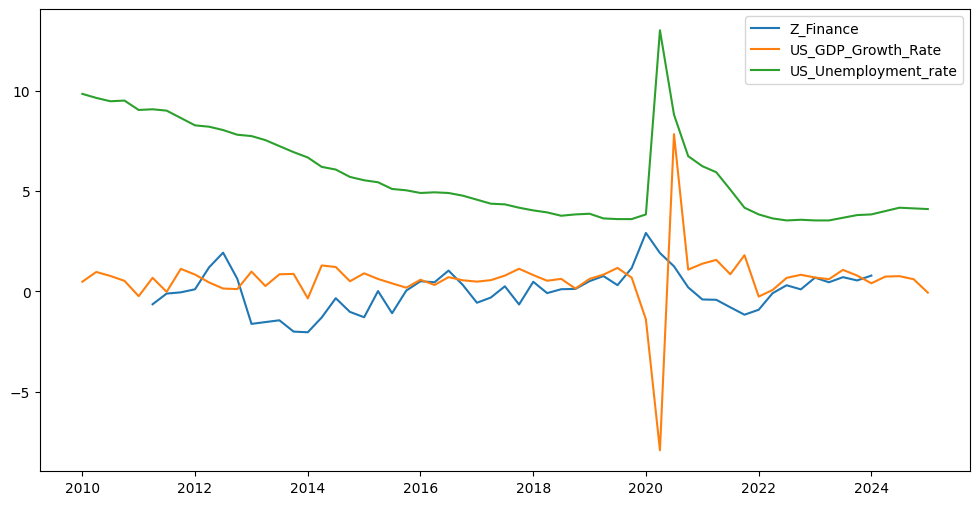

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df_full.index, df_full["Z_FINANCE"], label="Z_Finance")
plt.plot(df_full.index, df_full["US_GDP_Growth_Rate"], label="US_GDP_Growth_Rate")
plt.plot(df_full.index, df_full["US_Unemployment_rate"], label="US_Unemployment_rate")
plt.legend()
plt.show()

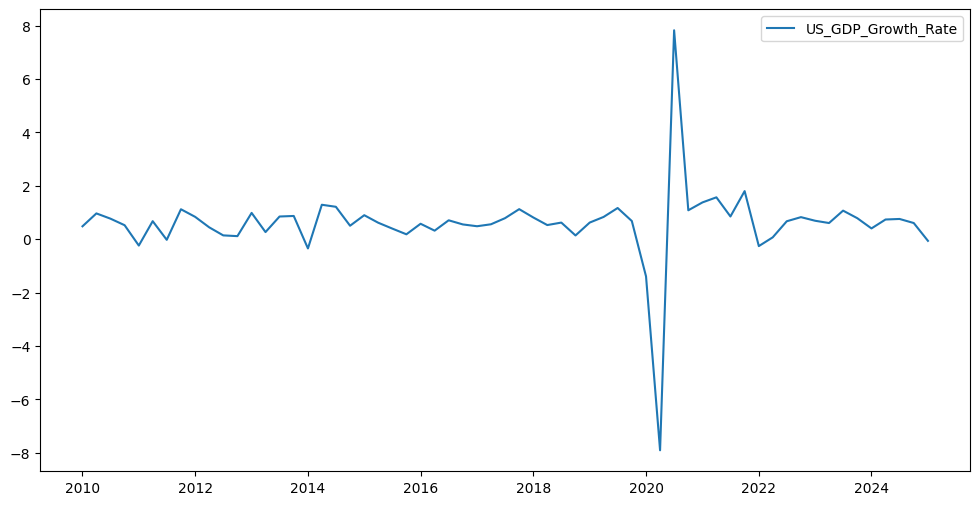

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(df_full.index, df_full["US_GDP_Growth_Rate"], 
         label="US_GDP_Growth_Rate")
plt.legend()
plt.show()

In [66]:
import numpy as np
import pandas as pd
import warnings

from statsmodels.tsa.stattools import adfuller, kpss

def stationarity_tests_summary(
    df: pd.DataFrame,
    variables=None,
    adf_alpha: float = 0.05,
    kpss_alpha: float = 0.05,
    kpss_regression: str = "c",
    autolag: str = "AIC",
    dropna: bool = True,
    min_n: int = 20
) -> pd.DataFrame:
    """
    Calcule ADF + KPSS pour une liste de variables, renvoie un tableau récapitulatif
    avec p-values, décisions à 5% et diagnostic.

    Parameters
    ----------
    df : DataFrame (wide) avec colonnes = variables.
    variables : list[str] ou None (par défaut: toutes les colonnes numériques).
    adf_alpha : seuil de rejet ADF (H0 = non-stationnaire).
    kpss_alpha : seuil de rejet KPSS (H0 = stationnaire).
    kpss_regression : 'c' (stationnaire autour d'une constante) ou 'ct' (constante+tendance).
    autolag : méthode de sélection du lag pour ADF ('AIC','BIC','t-stat',None).
    dropna : supprime les NA avant tests.
    min_n : taille minimale requise pour lancer les tests.

    Returns
    -------
    DataFrame avec colonnes:
    variable, n, adf_pvalue, kpss_pvalue, ADF_stationary_5pct, KPSS_stationary_5pct, diagnosis
    """
    if variables is None:
        # par défaut: toutes les colonnes numériques
        variables = df.select_dtypes(include=[np.number]).columns.tolist()
    else:
        variables = list(variables)

    results = []

    for var in variables:
        if var not in df.columns:
            results.append({
                "variable": var, "n": 0,
                "adf_pvalue": np.nan, "kpss_pvalue": np.nan,
                "ADF_stationary_5pct": np.nan, "KPSS_stationary_5pct": np.nan,
                "diagnosis": "Missing"
            })
            continue

        s = df[var]
        s = s.dropna() if dropna else s

        # Cast float (évite certains soucis)
        s = pd.to_numeric(s, errors="coerce").dropna()

        n = len(s)

        # Cas série trop courte / constante
        if n < min_n or s.nunique() <= 1:
            results.append({
                "variable": var, "n": n,
                "adf_pvalue": np.nan, "kpss_pvalue": np.nan,
                "ADF_stationary_5pct": np.nan, "KPSS_stationary_5pct": np.nan,
                "diagnosis": "Insufficient/Constant"
            })
            continue

        # -------- ADF --------
        adf_p = np.nan
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                adf_out = adfuller(s.values, autolag=autolag)
            adf_p = float(adf_out[1])
        except Exception:
            adf_p = np.nan

        # -------- KPSS --------
        kpss_p = np.nan
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                kpss_out = kpss(s.values, regression=kpss_regression, nlags="auto")
            kpss_p = float(kpss_out[1])
        except Exception:
            kpss_p = np.nan

        # Décisions
        # ADF: rejeter H0 (non-stationnaire) si p < alpha => stationnaire
        adf_stationary = (adf_p < adf_alpha) if not np.isnan(adf_p) else np.nan
        # KPSS: rejeter H0 (stationnaire) si p < alpha => non stationnaire
        # donc stationnaire si p > alpha
        kpss_stationary = (kpss_p > kpss_alpha) if not np.isnan(kpss_p) else np.nan

        # Diagnostic combiné
        if adf_stationary is True and kpss_stationary is True:
            diag = "Stationary"
        elif adf_stationary is False and kpss_stationary is False:
            diag = "Non-stationary"
        elif (adf_stationary is np.nan) or (kpss_stationary is np.nan):
            diag = "Test failed"
        else:
            diag = "Ambiguous"

        results.append({
            "variable": var,
            "n": n,
            "adf_pvalue": adf_p,
            "kpss_pvalue": kpss_p,
            "ADF_stationary_5pct": adf_stationary,
            "KPSS_stationary_5pct": kpss_stationary,
            "diagnosis": diag
        })

    out = pd.DataFrame(results)

    # Optionnel: trier pour lecture (Non-stationary / Ambiguous / Stationary)
    order = pd.CategoricalDtype(
        categories=["Non-stationary", "Ambiguous", "Stationary", "Insufficient/Constant", "Missing", "Test failed"],
        ordered=True
    )
    if "diagnosis" in out.columns:
        out["diagnosis"] = out["diagnosis"].astype(order)

    return out


In [67]:
variables = df_full.columns.tolist()
stationarity_df = stationarity_tests_summary(df_full, variables)
stationarity_df


,variable,n,adf_pvalue,kpss_pvalue,ADF_stationary_5pct,KPSS_stationary_5pct,diagnosis
0,EU_Central_bank_Intervention_rate_policy_inter...,61,8.188275e-01,0.076014,False,True,Ambiguous
1,EU_Effective_exchange_rate,61,4.423756e-01,0.010000,False,False,Non-stationary
2,EU_GDP_Growth_Rate,61,1.215274e-17,0.100000,True,True,Stationary
3,EU_Long_term_interest_rate,61,4.523473e-01,0.054863,False,True,Ambiguous
4,EU_Unemployment_rate,61,8.680491e-01,0.010000,False,False,Non-stationary
5,US_Central_bank_Intervention_rate_policy_inter...,61,9.969745e-01,0.010000,False,False,Non-stationary
6,US_Effective_exchange_rate,61,9.442045e-01,0.010000,False,False,Non-stationary
7,US_Equity_prices,61,9.988414e-01,0.010000,False,False,Non-stationary
8,US_GDP_Growth_Rate,61,7.219137e-11,0.100000,True,True,Stationary
9,US_House_prices_residential,61,9.306144e-01,0.010000,False,False,Non-stationary


## Stationnarité des variables macroéconomiques et transformations retenues

Les tests de stationnarité ADF et KPSS appliqués aux variables macroéconomiques indiquent que la majorité des séries en niveau sont non stationnaires, ce qui est conforme aux propriétés empiriques bien documentées des séries macroéconomiques. Afin d’éviter toute régression fallacieuse dans la modélisation satellite, ces variables sont transformées de manière appropriée pour assurer leur stationnarité avant estimation.

Les transformations retenues s’appuient sur les pratiques standards en économétrie appliquée et en modélisation du risque de crédit, en tenant compte de la nature économique de chaque variable.

---

### 🔹 Taux d’intérêt de la Banque Centrale
**Transformation : différence première**

Les taux directeurs présentent généralement des comportements persistants, marqués par des régimes de politique monétaire successifs. Leur niveau est souvent non stationnaire, tandis que leurs variations capturent les décisions discrétionnaires des banques centrales.

\[
\Delta r_t = r_t - r_{t-1}
\]

---

### 🔹 Taux d’intérêt à long terme
**Transformation : différence première**

Les taux longs reflètent les anticipations de croissance et d’inflation à long terme et sont susceptibles de contenir une tendance stochastique. La différenciation permet d’isoler les variations conjoncturelles pertinentes pour le risque de crédit.

---

### 🔹 Taux de chômage
**Transformation : différence première**

Le taux de chômage est une variable structurelle, caractérisée par une forte inertie. La différenciation permet de capturer les variations du marché du travail, plus directement liées aux cycles économiques.

---

### 🔹 Taux d’inflation (États-Unis)
**Transformation : différence première**

Bien que l’inflation soit parfois stationnaire selon la période considérée, elle peut présenter des ruptures de régime. La différenciation est retenue par prudence afin de garantir la stationnarité.

---

### 🔹 Produit Intérieur Brut (PIB)
**Transformation : variation logarithmique (log-ratio)**

Le PIB est une variable strictement croissante à long terme. La transformation logarithmique en taux de croissance permet d’obtenir une série stationnaire, interprétable comme une croissance économique.

\[
\Delta \log(Y_t) = \log(Y_t) - \log(Y_{t-1})
\]

---

### 🔹 Taux de change effectif
**Transformation : variation logarithmique (log-ratio)**

Les taux de change sont modélisés comme des processus intégrés. La variation logarithmique permet de capturer les rendements de change, généralement stationnaires.

---

### 🔹 Prix du marché boursier (États-Unis)
**Transformation : variation logarithmique (log-ratio)**

Les indices boursiers présentent une tendance de long terme liée à la croissance économique et à l’inflation. Les rendements logarithmiques constituent une représentation stationnaire et économiquement interprétable.

---

### 🔹 Prix de l’immobilier résidentiel (États-Unis)
**Transformation : variation logarithmique (log-ratio)**

Les prix immobiliers suivent des dynamiques de long terme avec des cycles marqués. La transformation en rendements logarithmiques permet de neutraliser la tendance et de capter les fluctuations cycliques.

---

### 🔹 Prix du pétrole (États-Unis)
**Transformation : variation logarithmique (log-ratio)**

Les prix des matières premières sont volatils et souvent non stationnaires en niveau. Les variations logarithmiques sont privilégiées afin de modéliser les chocs de prix de manière stationnaire.

---

### Conclusion

À l’issue de ces transformations, l’ensemble des variables macroéconomiques utilisées dans la modélisation satellite satisfait les conditions de stationnarité requises pour l’estimation de modèles linéaires. Les facteurs systémiques sectoriels, déjà stationnaires en niveau, sont conservés sans transformation supplémentaire.


In [68]:
df_full

,EU_Central_bank_Intervention_rate_policy_interest_rate,EU_Effective_exchange_rate,EU_GDP_Growth_Rate,EU_Long_term_interest_rate,EU_Unemployment_rate,US_Central_bank_Intervention_rate_policy_interest_rate,US_Effective_exchange_rate,US_Equity_prices,US_GDP_Growth_Rate,US_House_prices_residential,...,US_Oil_price,US_Unemployment_rate,Z_CONSTRUCTION_and_IMMOBILIER,Z_FINANCE,Z_INDUSTRIE,Z_INFO_COM,Z_PRIMAIRES_and_ÉNERGIE,Z_PUBLIC_and_SERVICES_NON_MARCHANDS,Z_SERVICES,Z_SERVICES_PRO
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1.000000,98.210000,0.357380,4.064402,10.100000,0.125000,84.740000,46.875171,0.484501,94.481014,...,76.674837,9.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,1.000000,92.703333,0.999191,3.841593,10.133330,0.125000,86.106667,41.314746,0.967586,93.876843,...,78.845036,9.633333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.000000,92.316667,0.478303,3.514643,10.033330,0.125000,84.923333,45.743602,0.771085,92.137491,...,76.675000,9.466666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,1.000000,94.203333,0.612048,3.707037,10.033330,0.125000,81.390000,50.410959,0.525110,90.641295,...,87.033160,9.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,1.000000,93.723333,0.961402,4.302840,9.933333,0.125000,80.343333,53.144269,-0.237205,87.908116,...,105.369424,9.033334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,4.500000,105.000000,0.300445,2.961033,6.066667,5.375000,107.953333,210.614185,0.404802,153.875453,...,81.955714,3.833333,0.29589,0.787104,0.564682,0.438356,-0.115225,0.678119,0.566278,0.343555
2024-04-01,4.416667,105.403333,0.298976,3.120024,6.000000,5.375000,110.086667,218.876649,0.738980,154.462696,...,84.981986,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01,4.000000,106.206667,0.386361,2.951025,5.933333,5.208333,109.493333,230.981949,0.759510,155.181924,...,78.708317,4.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
import numpy as np
import pandas as pd

TRANSFORMATIONS = {
    # Interest rates -> difference
    "EU_Central_bank_Intervention_rate_policy_interest_rate": "diff",
    "EU_Long_term_interest_rate": "diff",
    "US_Central_bank_Intervention_rate_policy_interest_rate": "diff",
    "US_Long_term_interest_rate": "diff",

    # Unemployment & inflation -> difference
    "EU_Unemployment_rate": "diff",
    "US_Unemployment_rate": "diff",
    "US_Inflation_rate": "diff",

    # Exchange rates -> log ratio
    "EU_Effective_exchange_rate": "log_ratio",
    "US_Effective_exchange_rate": "log_ratio",

    # Prices -> log ratio
    "US_Equity_prices": "log_ratio",
    "US_House_prices_residential": "log_ratio",
    "US_Oil_price": "log_ratio",

    # GDP growth rates -> keep (already stationary in your tests)
    "EU_GDP_Growth_Rate": "level",
    "US_GDP_Growth_Rate": "level",
}


In [70]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def _adf_kpss(series, regression="c"):
    s = series.dropna()
    if len(s) < 20:
        return np.nan, np.nan  # pas assez de points
    adf_p = adfuller(s, autolag="AIC")[1]
    kpss_p = kpss(s, regression=regression, nlags="auto")[1]
    return adf_p, kpss_p

def _diagnosis(adf_p, kpss_p, alpha=0.05):
    adf_stat = (adf_p < alpha) if pd.notna(adf_p) else False
    kpss_stat = (kpss_p > alpha) if pd.notna(kpss_p) else False
    if adf_stat and kpss_stat:
        return True, True, "Stationary"
    if (not adf_stat) and (not kpss_stat):
        return False, False, "Non-stationary"
    return adf_stat, kpss_stat, "Ambiguous"

def stationarize_and_test(
    df_wide: pd.DataFrame,
    transformations: dict,
    alpha: float = 0.05,
    kpss_regression: str = "c",
    add_prefix: bool = False,
):
    """
    df_wide: index=date (monthly), columns=variables
    transformations: dict {colname: 'level'|'diff'|'log_ratio'}
    add_prefix: if True, columns are renamed e.g. d_EU_rate, lr_US_fx, ...
    """
    df = df_wide.copy()

    # --- sanity check: missing keys / missing columns
    missing_in_df = [k for k in transformations.keys() if k not in df.columns]
    missing_in_dict = [c for c in df.columns if c not in transformations.keys()]

    if missing_in_df:
        print("⚠️ Keys in TRANSFORMATIONS but not in df columns:", missing_in_df)
    if missing_in_dict:
        print("⚠️ Columns in df but not in TRANSFORMATIONS (kept as level):", missing_in_dict)

    # default = level for unspecified columns
    trans = {c: transformations.get(c, "level") for c in df.columns}

    # --- tests BEFORE
    before_rows = []
    for c in df.columns:
        adf_p, kpss_p = _adf_kpss(df[c], regression=kpss_regression)
        adf_ok, kpss_ok, diag = _diagnosis(adf_p, kpss_p, alpha=alpha)
        before_rows.append({
            "variable": c,
            "transform": "level",
            "adf_pvalue": adf_p,
            "kpss_pvalue": kpss_p,
            "ADF_stationary_5pct": adf_ok,
            "KPSS_stationary_5pct": kpss_ok,
            "diagnosis": diag
        })
    before_df = pd.DataFrame(before_rows)

    # --- apply transformations
    out = pd.DataFrame(index=df.index)

    def apply_one(s, how):
        if how == "level":
            return s
        if how == "diff":
            return s.diff()
        if how == "log_ratio":
            # safe log: only for strictly positive series
            s2 = s.replace(0, np.nan)
            return np.log(s2).diff()
        raise ValueError(f"Unknown transformation: {how}")

    rename_map = {}
    for c in df.columns:
        how = trans[c]
        s_tr = apply_one(df[c], how)
        if add_prefix:
            pref = {"level":"", "diff":"d_", "log_ratio":"lr_"}[how]
            new_name = pref + c
        else:
            new_name = c
        out[new_name] = s_tr
        rename_map[c] = new_name

    # --- tests AFTER
    after_rows = []
    for c_old in df.columns:
        c = rename_map[c_old]
        how = trans[c_old]
        adf_p, kpss_p = _adf_kpss(out[c], regression=kpss_regression)
        adf_ok, kpss_ok, diag = _diagnosis(adf_p, kpss_p, alpha=alpha)
        after_rows.append({
            "variable": c_old,
            "transform": how,
            "adf_pvalue": adf_p,
            "kpss_pvalue": kpss_p,
            "ADF_stationary_5pct": adf_ok,
            "KPSS_stationary_5pct": kpss_ok,
            "diagnosis": diag
        })
    after_df = pd.DataFrame(after_rows)

    return out, before_df, after_df


In [71]:
# df_macro_wide : index = date_q, columns = variables
out, before_df, after_df= stationarize_and_test(df_full, TRANSFORMATIONS)

df_macro_stationary = after_df
df_macro_stationary

⚠️ Columns in df but not in TRANSFORMATIONS (kept as level): ['Z_CONSTRUCTION_and_IMMOBILIER', 'Z_FINANCE', 'Z_INDUSTRIE', 'Z_INFO_COM', 'Z_PRIMAIRES_and_ÉNERGIE', 'Z_PUBLIC_and_SERVICES_NON_MARCHANDS', 'Z_SERVICES', 'Z_SERVICES_PRO']


C:\Users\werid\AppData\Local\Temp\ipykernel_17380\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_17380\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_17380\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_17380\2235916527.py:10: InterpolationWarning: The test statistic is outsid

,variable,transform,adf_pvalue,kpss_pvalue,ADF_stationary_5pct,KPSS_stationary_5pct,diagnosis
0,EU_Central_bank_Intervention_rate_policy_inter...,diff,4.284015e-03,0.100000,True,True,Stationary
1,EU_Effective_exchange_rate,log_ratio,3.803437e-08,0.100000,True,True,Stationary
2,EU_GDP_Growth_Rate,level,1.215274e-17,0.100000,True,True,Stationary
3,EU_Long_term_interest_rate,diff,2.682484e-05,0.100000,True,True,Stationary
4,EU_Unemployment_rate,diff,3.104843e-03,0.100000,True,True,Stationary
5,US_Central_bank_Intervention_rate_policy_inter...,diff,2.157495e-02,0.100000,True,True,Stationary
6,US_Effective_exchange_rate,log_ratio,2.922463e-07,0.100000,True,True,Stationary
7,US_Equity_prices,log_ratio,4.108269e-05,0.100000,True,True,Stationary
8,US_GDP_Growth_Rate,level,7.219137e-11,0.100000,True,True,Stationary
9,US_House_prices_residential,log_ratio,7.571776e-02,0.100000,False,True,Ambiguous


In [72]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def _adf_kpss(series, regression="c"):
    s = series.dropna()
    if len(s) < 20:
        return np.nan, np.nan  # pas assez de points
    adf_p = adfuller(s, autolag="AIC")[1]
    kpss_p = kpss(s, regression=regression, nlags="auto")[1]
    return adf_p, kpss_p

def _diagnosis(adf_p, kpss_p, alpha=0.05):
    adf_stat = (adf_p < alpha) if pd.notna(adf_p) else False
    kpss_stat = (kpss_p > alpha) if pd.notna(kpss_p) else False
    if adf_stat and kpss_stat:
        return True, True, "Stationary"
    if (not adf_stat) and (not kpss_stat):
        return False, False, "Non-stationary"
    return adf_stat, kpss_stat, "Ambiguous"

def stationarize_and_test(
    df_wide: pd.DataFrame,
    transformations: dict,
    alpha: float = 0.05,
    kpss_regression: str = "c",
    add_prefix: bool = False,
):
    """
    df_wide: index=date (monthly), columns=variables
    transformations: dict {colname: 'level'|'diff'|'log_ratio'}
    add_prefix: if True, columns are renamed e.g. d_EU_rate, lr_US_fx, ...
    """
    df = df_wide.copy()

    # --- sanity check: missing keys / missing columns
    missing_in_df = [k for k in transformations.keys() if k not in df.columns]
    missing_in_dict = [c for c in df.columns if c not in transformations.keys()]

    if missing_in_df:
        print("⚠️ Keys in TRANSFORMATIONS but not in df columns:", missing_in_df)
    if missing_in_dict:
        print("⚠️ Columns in df but not in TRANSFORMATIONS (kept as level):", missing_in_dict)

    # default = level for unspecified columns
    trans = {c: transformations.get(c, "level") for c in df.columns}

    # --- tests BEFORE
    before_rows = []
    for c in df.columns:
        adf_p, kpss_p = _adf_kpss(df[c], regression=kpss_regression)
        adf_ok, kpss_ok, diag = _diagnosis(adf_p, kpss_p, alpha=alpha)
        before_rows.append({
            "variable": c,
            "transform": "level",
            "adf_pvalue": adf_p,
            "kpss_pvalue": kpss_p,
            "ADF_stationary_5pct": adf_ok,
            "KPSS_stationary_5pct": kpss_ok,
            "diagnosis": diag
        })
    before_df = pd.DataFrame(before_rows)

    # --- apply transformations
    out = pd.DataFrame(index=df.index)

    def apply_one(s, how):
        if how == "level":
            return s
        if how == "diff":
            return s.diff()
        if how == "log_ratio":
            # safe log: only for strictly positive series
            s2 = s.replace(0, np.nan)
            return np.log(s2).diff()
        raise ValueError(f"Unknown transformation: {how}")

    rename_map = {}
    for c in df.columns:
        how = trans[c]
        s_tr = apply_one(df[c], how)
        if add_prefix:
            pref = {"level":"", "diff":"d_", "log_ratio":"lr_"}[how]
            new_name = pref + c
        else:
            new_name = c
        out[new_name] = s_tr
        rename_map[c] = new_name

    # --- tests AFTER
    after_rows = []
    for c_old in df.columns:
        c = rename_map[c_old]
        how = trans[c_old]
        adf_p, kpss_p = _adf_kpss(out[c], regression=kpss_regression)
        adf_ok, kpss_ok, diag = _diagnosis(adf_p, kpss_p, alpha=alpha)
        after_rows.append({
            "variable": c_old,
            "transform": how,
            "adf_pvalue": adf_p,
            "kpss_pvalue": kpss_p,
            "ADF_stationary_5pct": adf_ok,
            "KPSS_stationary_5pct": kpss_ok,
            "diagnosis": diag
        })
    after_df = pd.DataFrame(after_rows)

    return out, before_df, after_df


In [73]:
df_macro_stationary, tests_before, tests_after = stationarize_and_test(
    df_full,
    TRANSFORMATIONS,
    alpha=0.05,
    add_prefix=False
)

df_macro_stationary.head()
tests_after.sort_values("diagnosis").head(20)


⚠️ Columns in df but not in TRANSFORMATIONS (kept as level): ['Z_CONSTRUCTION_and_IMMOBILIER', 'Z_FINANCE', 'Z_INDUSTRIE', 'Z_INFO_COM', 'Z_PRIMAIRES_and_ÉNERGIE', 'Z_PUBLIC_and_SERVICES_NON_MARCHANDS', 'Z_SERVICES', 'Z_SERVICES_PRO']


C:\Users\werid\AppData\Local\Temp\ipykernel_17380\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_17380\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_17380\2235916527.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(s, regression=regression, nlags="auto")[1]
C:\Users\werid\AppData\Local\Temp\ipykernel_17380\2235916527.py:10: InterpolationWarning: The test statistic is outsid

,variable,transform,adf_pvalue,kpss_pvalue,ADF_stationary_5pct,KPSS_stationary_5pct,diagnosis
10,US_Inflation_rate,diff,9.072526e-02,0.100000,False,True,Ambiguous
19,Z_PUBLIC_and_SERVICES_NON_MARCHANDS,level,1.831503e-01,0.100000,False,True,Ambiguous
15,Z_FINANCE,level,5.374766e-02,0.100000,False,True,Ambiguous
14,Z_CONSTRUCTION_and_IMMOBILIER,level,1.257648e-13,0.047357,True,False,Ambiguous
9,US_House_prices_residential,log_ratio,7.571776e-02,0.100000,False,True,Ambiguous
20,Z_SERVICES,level,8.616089e-02,0.100000,False,True,Ambiguous
18,Z_PRIMAIRES_and_ÉNERGIE,level,1.361861e-02,0.100000,True,True,Stationary
17,Z_INFO_COM,level,1.024406e-03,0.100000,True,True,Stationary
16,Z_INDUSTRIE,level,1.094503e-02,0.100000,True,True,Stationary
13,US_Unemployment_rate,diff,3.610072e-10,0.100000,True,True,Stationary


Pour les taux directeurs, la différenciation première est retenue afin d’assurer la stationnarité. Dans certains cas, les tests ADF et KPSS conduisent à des conclusions divergentes, ce qui est un résultat classique pour des séries caractérisées par de longues périodes de paliers et des changements discrets. Conformément aux pratiques usuelles, la décision repose principalement sur le test ADF et sur la cohérence économique de la transformation.


# Modèles Satellites

## Modèles satellites macroéconomiques (Model Averaging)


### Objectif
L'objectif des modèles satellites est de relier, pour chaque secteur $s$, le facteur de risque systémique estimé à l'étape précédente, noté $Z_{s,t}$ (ou sa version standardisée $\tilde Z_{s,t}$), à un ensemble de variables macroéconomiques $X_t$.  
Cette relation permet (i) d'interpréter économiquement la dynamique du risque de crédit sectoriel et (ii) de projeter $Z_{s,t}$ sous scénarios macroéconomiques (notamment NGFS) dans les étapes ultérieures.

### Alignement temporel et transformations
Les facteurs $Z_{s,t}$ sont initialement estimés à fréquence mensuelle. Afin d'assurer la cohérence avec les variables macroéconomiques disponibles à fréquence trimestrielle, une agrégation trimestrielle est retenue :
$$
Z_{s,q} = \frac{1}{3}\sum_{m \in q} Z_{s,m},
$$
où $q$ désigne un trimestre. Les facteurs sont ensuite standardisés par secteur :
$$
\tilde Z_{s,q} = \frac{Z_{s,q} - \mu_s}{\sigma_s}.
$$
Les variables macroéconomiques sont stationnarisées selon des transformations usuelles (différences premières pour les taux et le chômage, log-ratios pour les niveaux de prix et d'activité), conformément aux tests ADF et KPSS.

### Spécification des modèles candidats
Pour chaque secteur $s$, on considère une famille de modèles linéaires candidats $\{M_k\}_{k=1}^K$, de la forme :
$$
\tilde Z_{s,q} = \alpha_{s,k} + \beta_{s,k}' X^{(k)}_{q-\ell} + u_{s,q},
$$
où $X^{(k)}$ représente un sous-ensemble de variables macroéconomiques (éventuellement retardées), et $\ell$ un ordre de retard retenu (par exemple $\ell \in \{0,1,2\}$).  
L'espace des modèles est construit de façon parcimonieuse afin de limiter la colinéarité et d'assurer une interprétabilité économique.

### Estimation et pondération (Model Averaging)
Chaque modèle $M_k$ est estimé par moindres carrés ordinaires.  
Plutôt que de sélectionner un unique modèle, une combinaison pondérée des prédictions est retenue :
$$
\widehat{\tilde Z}_{s,q} = \sum_{k=1}^K w_k \widehat{\tilde Z}^{(k)}_{s,q},
\qquad \sum_{k=1}^K w_k = 1,\; w_k \ge 0.
$$
Les poids $w_k$ peuvent être déterminés soit par un critère informationnel (AIC/BIC), soit sur la base de la performance prédictive hors-échantillon.  
Dans ce travail, une pondération basée sur la performance hors-échantillon est privilégiée, afin de maximiser la robustesse des projections.

### Validation
La validation repose sur (i) des mesures de performance en prévision (RMSE hors-échantillon), (ii) la stabilité des résidus (autocorrélation et stationnarité), et (iii) la cohérence économique des signes estimés.  
Les poids associés aux modèles dominants sont analysés afin d'identifier les principaux déterminants macroéconomiques du risque de crédit sectoriel.


In [74]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm

def _all_combinations(items, min_k=1, max_k=None):
    items = list(items)
    if max_k is None:
        max_k = len(items)
    for k in range(min_k, max_k + 1):
        for comb in itertools.combinations(items, k):
            yield list(comb)

def _build_design_matrix(df, x_cols, add_const=True):
    X = df[x_cols].copy()
    if add_const:
        X = sm.add_constant(X, has_constant="add")
    return X

def _fit_ols(df, y_col, x_cols, add_const=True):
    d = df[[y_col] + x_cols].dropna()
    if d.shape[0] < 30:  # garde-fou : trop peu d'observations
        return None
    
    y = d[y_col].astype(float)
    X = _build_design_matrix(d, x_cols, add_const=add_const).astype(float)
    
    try:
        model = sm.OLS(y, X).fit()
        return model
    except Exception:
        return None

def _sign_ok(beta, expected_sign, tol=1e-12):
    """
    beta: Series of coefficients (incl. const possible)
    expected_sign: dict {var: +1 or -1}
    """
    for var, sgn in expected_sign.items():
        if var not in beta.index:
            continue  # var pas dans ce modèle
        b = beta[var]
        # on tolère quasi-zéro (pour éviter de rejeter pour bruit numérique)
        if abs(b) <= tol:
            continue
        if np.sign(b) != np.sign(sgn):
            return False
    return True


In [75]:
def add_lags(df, cols, lags=(0,1,2), sep="_L"):
    """
    Crée des colonnes décalées.
    ex: GDP -> GDP_L0, GDP_L1, GDP_L2
    """
    out = df.copy()
    new_cols = []
    for c in cols:
        for L in lags:
            name = f"{c}{sep}{L}"
            out[name] = out[c].shift(L)
            new_cols.append(name)
    return out, new_cols


In [76]:
def build_admissible_model_space(
    df,
    y_col,
    x_base_cols,
    expected_sign_base,
    min_k=1,
    max_k=6,
    use_lags=False,
    lags=(0,1,2),
    lag_sep="_L",
    add_const=True,
    alpha_sign=0.05,
    require_significant=False,
    verbose=True
):
    """
    - Génère toutes les combinaisons de variables (entre min_k et max_k)
    - Estime un OLS pour chaque combinaison
    - Filtre selon signes métier (et optionnellement significance)
    
    expected_sign_base: dict {col_name: +1 or -1} pour les variables NON laggées
    Si use_lags=True, on applique le même signe à tous les lags (GDP_L1 etc.)
    """

    df_work = df.copy()

    # 1) lags
    if use_lags:
        df_work, x_cols = add_lags(df_work, x_base_cols, lags=lags, sep=lag_sep)
        # étendre les signes attendus à tous les lags
        expected_sign = {}
        for base, sgn in expected_sign_base.items():
            for L in lags:
                expected_sign[f"{base}{lag_sep}{L}"] = sgn
    else:
        x_cols = list(x_base_cols)
        expected_sign = dict(expected_sign_base)

    # 2) générer les combinaisons
    combos = list(_all_combinations(x_cols, min_k=min_k, max_k=min(max_k, len(x_cols))))
    if verbose:
        print(f"Nombre de modèles candidats: {len(combos)} (y={y_col})")

    rows = []
    admissible_models = []

    for x_list in combos:
        m = _fit_ols(df_work, y_col=y_col, x_cols=x_list, add_const=add_const)
        if m is None:
            continue
        
        beta = m.params
        
        # Filtre signe
        ok_sign = _sign_ok(beta, expected_sign)
        if not ok_sign:
            rows.append({
                "y": y_col,
                "k": len(x_list),
                "x": tuple(x_list),
                "ok_sign": False,
                "ok_sig": None,
                "aic": m.aic,
                "bic": m.bic,
                "r2_adj": m.rsquared_adj,
                "n": int(m.nobs)
            })
            continue

        # Filtre optionnel : coefficients significatifs ET au bon signe
        ok_sig = True
        if require_significant:
            pvals = m.pvalues
            for var in x_list:
                if var in pvals.index and pvals[var] > alpha_sign:
                    ok_sig = False
                    break
        
        rows.append({
            "y": y_col,
            "k": len(x_list),
            "x": tuple(x_list),
            "ok_sign": True,
            "ok_sig": ok_sig,
            "aic": m.aic,
            "bic": m.bic,
            "r2_adj": m.rsquared_adj,
            "n": int(m.nobs)
        })

        if ok_sig:
            admissible_models.append({
                "x": x_list,
                "model": m
            })

    summary = pd.DataFrame(rows).sort_values(["ok_sign", "ok_sig", "bic"], ascending=[False, False, True])

    if verbose:
        total = len(combos)
        ok_sign_count = int((summary["ok_sign"] == True).sum()) if len(summary) else 0
        ok_sig_count = int(((summary["ok_sign"] == True) & (summary["ok_sig"] == True)).sum()) if len(summary) else 0
        print(f"OK signes: {ok_sign_count}/{total}")
        if require_significant:
            print(f"OK signes + significatifs: {ok_sig_count}/{total}")

    return summary, admissible_models, df_work


In [77]:
EXPECTED_SIGN = {
    "EU_Central_bank_Intervention_rate_policy_interest_rate": -1,
    "EU_Long_term_interest_rate": -1,
    "EU_Unemployment_rate": -1,
    "US_Inflation_rate": -1,
    "EU_GDP_Growth_Rate": +1,
    "US_House_prices_residential": +1,
    # si tu ajoutes d'autres variables, précise le signe
}


In [85]:
x_cols

['EU_Central_bank_Intervention_rate_policy_interest_rate',
 'EU_Effective_exchange_rate',
 'EU_GDP_Growth_Rate',
 'EU_Long_term_interest_rate',
 'EU_Unemployment_rate',
 'US_Central_bank_Intervention_rate_policy_interest_rate',
 'US_Effective_exchange_rate',
 'US_Equity_prices',
 'US_GDP_Growth_Rate',
 'US_House_prices_residential',
 'US_Inflation_rate',
 'US_Long_term_interest_rate',
 'US_Oil_price',
 'US_Unemployment_rate']

In [107]:
y_col = "Z_PRIMAIRES_and_ÉNERGIE"
x_cols = df_macro_stationary.loc[:, ~df_macro_stationary.columns.str.startswith("Z_")].columns.tolist()

summary, admissible, df_used = build_admissible_model_space(
    df=df_macro_stationary,            # ton df stationnarisé aligné
    y_col=y_col,
    x_base_cols=x_cols,
    expected_sign_base=EXPECTED_SIGN,
    min_k=1,
    max_k=3,                      # évite explosion combinatoire
    use_lags=True,
    lags=(0,1,2,3,4),
    require_significant=False,    # mets True si tu veux filtrer aussi sur p-values
    verbose=True
)





Nombre de modèles candidats: 57225 (y=Z_PRIMAIRES_and_ÉNERGIE)
OK signes: 29634/57225


In [93]:
summary

,y,k,x,ok_sign,ok_sig,aic,bic,r2_adj,n
44721,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,99.690318,107.495293,0.630113,52
44707,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,104.485868,112.290843,0.594379,52
43818,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,106.022417,113.827392,0.582215,52
36237,Z_PRIMAIRES_and_ÉNERGIE,3,"(EU_Long_term_interest_rate_L3, US_Inflation_r...",True,True,106.230332,114.035307,0.580541,52
44841,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,106.782176,114.587150,0.576066,52
...,...,...,...,...,...,...,...,...,...
52476,Z_PRIMAIRES_and_ÉNERGIE,3,"(US_Equity_prices_L3, US_House_prices_resident...",False,None,154.402329,162.207304,-0.059286,52
54046,Z_PRIMAIRES_and_ÉNERGIE,3,"(US_GDP_Growth_Rate_L2, US_House_prices_reside...",False,None,154.403840,162.208815,-0.059317,52
42546,Z_PRIMAIRES_and_ÉNERGIE,3,"(EU_Unemployment_rate_L4, US_Equity_prices_L3,...",False,None,154.403891,162.208866,-0.059318,52
42660,Z_PRIMAIRES_and_ÉNERGIE,3,"(EU_Unemployment_rate_L4, US_GDP_Growth_Rate_L...",False,None,154.409638,162.214613,-0.059435,52


In [73]:
x_cols

['EU_Central_bank_Intervention_rate_policy_interest_rate',
 'EU_Effective_exchange_rate',
 'EU_GDP_Growth_Rate',
 'EU_Long_term_interest_rate',
 'EU_Unemployment_rate',
 'US_Central_bank_Intervention_rate_policy_interest_rate',
 'US_Effective_exchange_rate',
 'US_Equity_prices',
 'US_GDP_Growth_Rate',
 'US_House_prices_residential',
 'US_Inflation_rate',
 'US_Long_term_interest_rate',
 'US_Oil_price',
 'US_Unemployment_rate']

In [94]:
summary.sort_values(by="r2_adj",ascending=False).head(20)

,y,k,x,ok_sign,ok_sig,aic,bic,r2_adj,n
44721,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,99.690318,107.495293,0.630113,52
44707,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,104.485868,112.290843,0.594379,52
43818,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,106.022417,113.827392,0.582215,52
36237,Z_PRIMAIRES_and_ÉNERGIE,3,"(EU_Long_term_interest_rate_L3, US_Inflation_r...",True,True,106.230332,114.035307,0.580541,52
44841,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,106.782176,114.587150,0.576066,52
56897,Z_PRIMAIRES_and_ÉNERGIE,3,"(US_Long_term_interest_rate_L1, US_Oil_price_L...",True,True,107.481848,115.286823,0.570323,52
43939,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,109.176840,116.981815,0.556087,52
43804,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,109.419644,117.224619,0.554009,52
44839,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,109.483292,117.288267,0.553463,52
44842,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,110.062032,117.867007,0.548465,52


In [95]:
top10 = summary[(summary["ok_sign"] == True) & (summary["ok_sig"] != False)].head(10)
top10


,y,k,x,ok_sign,ok_sig,aic,bic,r2_adj,n
44721,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,99.690318,107.495293,0.630113,52
44707,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,104.485868,112.290843,0.594379,52
43818,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,106.022417,113.827392,0.582215,52
36237,Z_PRIMAIRES_and_ÉNERGIE,3,"(EU_Long_term_interest_rate_L3, US_Inflation_r...",True,True,106.230332,114.035307,0.580541,52
44841,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,106.782176,114.587150,0.576066,52
56897,Z_PRIMAIRES_and_ÉNERGIE,3,"(US_Long_term_interest_rate_L1, US_Oil_price_L...",True,True,107.481848,115.286823,0.570323,52
43939,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,109.176840,116.981815,0.556087,52
43804,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,109.419644,117.224619,0.554009,52
44839,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,109.483292,117.288267,0.553463,52
44842,Z_PRIMAIRES_and_ÉNERGIE,3,(US_Central_bank_Intervention_rate_policy_inte...,True,True,110.062032,117.867007,0.548465,52


In [96]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller

from scipy.stats import shapiro, jarque_bera


In [97]:
def fit_ols_hac(df, y_col, x_cols, hac_lags=4, add_const=True):
    d = df[[y_col] + x_cols].dropna().copy()
    if d.shape[0] < 40:
        return None

    y = d[y_col].astype(float)
    X = d[x_cols].astype(float)
    if add_const:
        X = sm.add_constant(X, has_constant="add")

    try:
        ols = sm.OLS(y, X).fit()
        hac = ols.get_robustcov_results(cov_type="HAC", maxlags=hac_lags)
        return {"ols": ols, "hac": hac, "data": d, "X": X, "y": y}
    except Exception:
        return None


In [98]:
def residual_diagnostics(fit_dict, lb_lags=12, alpha=0.05):
    """
    Retourne p-values et flags d'acceptation / rejet (décision "soft" possible).
    """
    ols = fit_dict["ols"]
    d = fit_dict["data"]
    X = fit_dict["X"]
    y = fit_dict["y"]

    resid = ols.resid

    # Ljung-Box (sur résidus)
    lb = acorr_ljungbox(resid, lags=[lb_lags], return_df=True)
    lb_p = float(lb["lb_pvalue"].iloc[0])

    # Breusch-Pagan
    # statsmodels attend resid et exog (sans y)
    bp_stat, bp_p, _, _ = het_breuschpagan(resid, X)

    # Shapiro (si n trop grand, Shapiro devient très sensible)
    sh_p = shapiro(resid)[1] if len(resid) <= 5000 else np.nan

    # JB (alternative)
    jb_p = jarque_bera(resid)[1]

    # ADF sur résidus (optionnel mais utile)
    adf_p = adfuller(resid.dropna(), autolag="AIC")[1] if resid.notna().sum() > 20 else np.nan

    # Durbin-Watson (info)
    dw = durbin_watson(resid)

    out = {
        "n": int(len(resid)),
        "lb_pvalue": lb_p,
        "bp_pvalue": float(bp_p),
        "shapiro_pvalue": float(sh_p) if not np.isnan(sh_p) else np.nan,
        "jb_pvalue": float(jb_p),
        "adf_resid_pvalue": float(adf_p) if not np.isnan(adf_p) else np.nan,
        "dw": float(dw),
        "LB_ok_5pct": (lb_p > alpha),
        "BP_ok_5pct": (bp_p > alpha),
        "Shapiro_ok_5pct": (sh_p > alpha) if not np.isnan(sh_p) else None,
        "ADF_resid_ok_5pct": (adf_p < alpha) if not np.isnan(adf_p) else None,  # H0: non-stationary
    }
    return out


In [99]:
def sign_constraints_ok(params, expected_sign, tol=1e-12):
    for var, sgn in expected_sign.items():
        if var in params.index:
            b = params[var]
            if abs(b) <= tol:
                continue
            if np.sign(b) != np.sign(sgn):
                return False
    return True

def hac_significance_ok(hac_res, x_cols, alpha=0.05, require_all=False, min_sig=1):
    """
    - require_all=True : toutes les variables doivent être significatives
    - sinon : au moins min_sig variables significatives
    """
    pvals = pd.Series(hac_res.pvalues, index=hac_res.model.exog_names)

    # enlever la constante si présente
    vars_in = [v for v in x_cols if v in pvals.index]

    sig_count = int((pvals[vars_in] < alpha).sum()) if len(vars_in) else 0
    if require_all:
        return sig_count == len(vars_in)
    else:
        return sig_count >= min_sig


In [100]:
def rolling_oos_predictions(df, y_col, x_cols, start_train=60, hac_lags=4, add_const=True):
    """
    Expanding window, one-step-ahead.
    Renvoie une série de prédictions OOS alignée sur df.index.
    """
    idx = df.index
    yhat = pd.Series(index=idx, dtype=float)

    for t in range(start_train, len(df)):
        train = df.iloc[:t].copy()
        test = df.iloc[t:t+1].copy()

        fit = fit_ols_hac(train, y_col, x_cols, hac_lags=hac_lags, add_const=add_const)
        if fit is None:
            continue

        X_test = test[x_cols].astype(float)
        if add_const:
            X_test = sm.add_constant(X_test, has_constant="add")

        yhat.iloc[t] = float(fit["ols"].predict(X_test).iloc[0])

    return yhat


In [101]:
def solve_simplex_weights(Y, y):
    """
    Min || y - Y w ||^2  s.c. w>=0, sum w=1
    Y: (T, M), y: (T,)
    """
    try:
        import cvxpy as cp
    except ImportError:
        return None

    T, M = Y.shape
    w = cp.Variable(M)
    objective = cp.Minimize(cp.sum_squares(y - Y @ w))
    constraints = [w >= 0, cp.sum(w) == 1]
    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.ECOS, verbose=False)
    if w.value is None:
        return None
    return np.array(w.value).ravel()


In [102]:
def build_candidate_pool_and_filter(
    df, y_col, candidate_models, expected_sign,
    hac_lags=4, lb_lags=12, alpha=0.05,
    require_sig=False, sig_alpha=0.05, min_sig=1,
    enforce_bp=False, enforce_lb=True
):
    """
    candidate_models = list of dicts: [{"x": [...], "name": "m1"}, ...]
    """
    kept = []
    summary_rows = []

    for m in candidate_models:
        x_cols = m["x"]
        fit = fit_ols_hac(df, y_col, x_cols, hac_lags=hac_lags)
        if fit is None:
            continue

        # signe (sur coefficients OLS)
        ok_sign = sign_constraints_ok(fit["ols"].params, expected_sign)

        # diag résidus
        diag = residual_diagnostics(fit, lb_lags=lb_lags, alpha=alpha)

        # significativité HAC
        ok_sig = True
        if require_sig:
            ok_sig = hac_significance_ok(
                fit["hac"], x_cols, alpha=sig_alpha, require_all=False, min_sig=min_sig
            )

        # règles de filtre
        ok_lb = diag["LB_ok_5pct"] if enforce_lb else True
        ok_bp = diag["BP_ok_5pct"] if enforce_bp else True

        ok = ok_sign and ok_lb and ok_bp and ok_sig

        summary_rows.append({
            "model": m.get("name", str(tuple(x_cols))),
            "k": len(x_cols),
            "ok": ok,
            "ok_sign": ok_sign,
            "ok_lb": ok_lb,
            "ok_bp": ok_bp,
            "ok_sig": ok_sig,
            "aic": fit["ols"].aic,
            "bic": fit["ols"].bic,
            "r2_adj": fit["ols"].rsquared_adj,
            **diag
        })

        if ok:
            kept.append(m)

    summary = pd.DataFrame(summary_rows).sort_values(["ok", "bic"], ascending=[False, True])
    return kept, summary


In [103]:
def stacking_and_jma(
    df, y_col, kept_models,
    start_train=60, hac_lags=4,
    weight_solver="auto"
):
    """
    Retourne weights_stacking, weights_jma + matrice prédictions OOS.
    Ici stacking et JMA utilisent le même design OOS (rolling one-step).
    (Tu peux différencier si tu veux un vrai LOOCV "pointwise".)
    """
    # 1) construire matrice OOS predictions
    preds = {}
    for i, m in enumerate(kept_models):
        name = m.get("name", f"m{i}")
        preds[name] = rolling_oos_predictions(
            df=df, y_col=y_col, x_cols=m["x"],
            start_train=start_train, hac_lags=hac_lags
        )

    P = pd.DataFrame(preds)
    # on ne garde que les dates où on a un y et des preds
    d = pd.concat([df[[y_col]], P], axis=1).dropna()
    y = d[y_col].values
    Y = d[P.columns].values  # (T, M)

    # 2) solve weights
    if weight_solver == "auto":
        w = solve_simplex_weights(Y, y)
        if w is None:
            w = solve_simplex_weigNhts_slsqp(Y, y)
    elif weight_solver == "cvxpy":
        w = solve_simplex_weights(Y, y)
    else:
        w = solve_simplex_weights_slsqp(Y, y)

    if w is None:
        raise RuntimeError("Impossible de résoudre les poids (solver a échoué).")

    weights_stacking = pd.Series(w, index=P.columns, name="w_stacking")

    # 3) JMA (dans ta contrainte, tu peux appeler ça JMA car weights minimisent l'erreur jackknife/rolling)
    # Ici, même critère => mêmes poids. Si tu veux différencier, on peut définir un critère JMA spécifique.
    weights_jma = weights_stacking.rename("w_jma")

    # 4) prediction finale (stacked)
    yhat_stacked = pd.Series((Y @ w), index=d.index, name="yhat_stacked")

    return {
        "oos_frame": d,
        "P": P,
        "weights_stacking": weights_stacking,
        "weights_jma": weights_jma,
        "yhat_stacked": yhat_stacked
    }


In [104]:
candidate_models = []
for i, comb in enumerate(top10):  # ex: sorties de ton générateur combinaisons
    candidate_models.append({"name": f"m{i}", "x": comb})


In [108]:
kept, summary = build_candidate_pool_and_filter(
    df=df_macro_stationary,               # df avec y_col + macro (stationnarisées)
    y_col="Z_Finance",
    candidate_models=candidate_models,
    expected_sign=EXPECTED_SIGN, # dict signe métier
    hac_lags=4,
    lb_lags=12,
    alpha=0.05,
    require_sig=True,           # <- tu veux “Significativité des paramètres”
    sig_alpha=0.05,
    min_sig=1,
    enforce_bp=False,           # souvent on ne "hard-filter" pas BP si HAC utilisé
    enforce_lb=True             # <- contrainte 6.4 Ljung–Box
)

summary.head(20)
print("Nb modèles gardés:", len(kept))


TypeError: can only concatenate list (not "str") to list